# Analysis of William Ruto’s 2023 and 2024 State of the Nation Speeches
Analyzing sentiment, word overlap, and key terms for speeches by William Ruto.

In [ ]:
import os
import pdfplumber
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.data.path = ['/home/sj/nltk_data']

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    print("Downloading punkt_tab...")
    nltk.download('punkt_tab', download_dir='/home/sj/nltk_data')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("Downloading stopwords...")
    nltk.download('stopwords', download_dir='/home/sj/nltk_data')

stop_words = set(stopwords.words('english'))

In [ ]:
# Load and extract texts
base_dir = "Speeches/William_Ruto"
speeches = []

if os.path.exists(base_dir):
    print(f"Folder found: {base_dir}")
    for filename in os.listdir(base_dir):
        if filename in ["speech_1.pdf", "speech_2.pdf"]:
            file_path = os.path.join(base_dir, filename)
            print(f"Found PDF: {file_path}")
            with pdfplumber.open(file_path) as pdf:
                text = ""
                for page in pdf.pages:
                    text += page.extract_text() or ""
                speeches.append(text)
                print(f"Processed: {file_path}")
        else:
            print(f"Skipping: {base_dir}/{filename}")
else:
    print(f"Folder not found: {base_dir}")

Folder found: Speeches/William_Ruto
Found PDF: Speeches/William_Ruto/speech_2.pdf
Processed: Speeches/William_Ruto/speech_2.pdf
Found PDF: Speeches/William_Ruto/speech_1.pdf
Processed: Speeches/William_Ruto/speech_1.pdf


In [ ]:
# Verification
print(f"\nExtracted {len(speeches)} speeches:")
for i, text in enumerate(speeches):
    print(f"Speech {i+1}: {text[:50].replace('\n', ' ')}...")


Extracted 2 speeches:
Speech 1: REPUBLIC OF KENYA STATE OF THE NATION ADDRESS BY H...
Speech 2: REPUBLIC OF KENYA STATE OF THE NATION ADDRESS BY H...


In [ ]:
# Tokenization
print("\nTokenizing and cleaning speeches:")
for i, text in enumerate(speeches):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalnum()]
    speeches[i] = filtered_tokens
    print(f"Speech {i+1} tokens (first 10): {filtered_tokens[:20]}")


Tokenizing and cleaning speeches:
Speech 1 tokens (first 10): ['republic', 'kenya', 'state', 'nation', 'address', 'excellency', 'william', 'ruto', 'phd', 'president', 'kenya', 'defence', 'forces', 'november', '9th', '2023', 'parliament', 'buildings', 'nairobistate', 'nation']
Speech 2 tokens (first 10): ['republic', 'kenya', 'state', 'nation', 'address', 'excellency', 'william', 'ruto', 'phd', 'president', 'kenya', 'defence', 'forces', 'november', '21', '2024', 'parliament', 'kenya', 'nairobistate', 'nation']


In [ ]:
#frequency analysis

from nltk import FreqDist

all_tokens = []
for tokens in speeches:
    all_tokens.extend(tokens)

freq_dist = FreqDist(all_tokens)
print("\nTop 10 most common words in William Ruto's speeches:")
for word, freq in freq_dist.most_common(10):
    print(f"{word}: {freq}")


Top 10 most common words in William Ruto's speeches:
kenya: 116
nation: 86
address: 59
president: 53
defence: 52
forces: 52
national: 52
excellency: 51
william: 51
ruto: 51


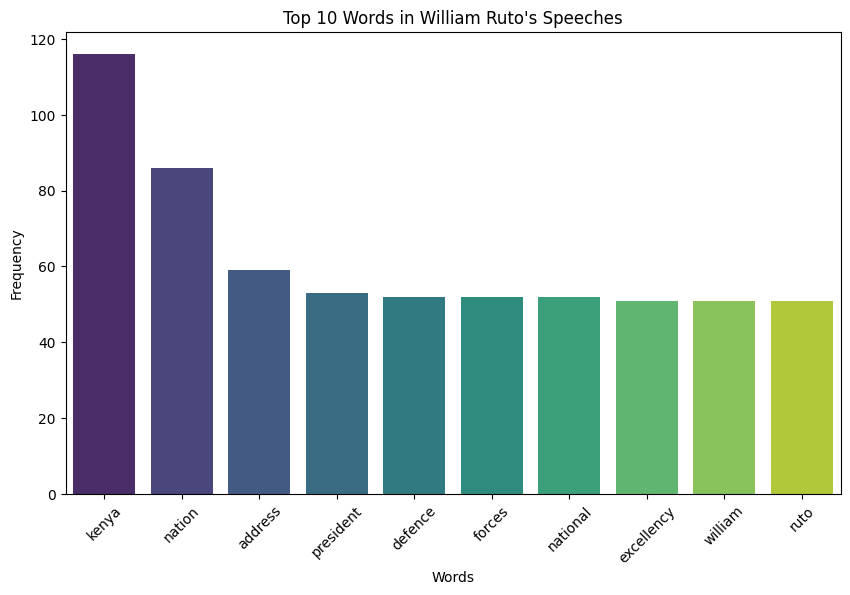

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_words = freq_dist.most_common(10) 

# Split into words and counts
words, counts = zip(*top_words)  

# Create bar plot
plt.figure(figsize=(10, 6))  
sns.barplot(x=list(words), y=list(counts), hue=list(words), palette="viridis", legend=False)
plt.title("Top 10 Words in William Ruto's Speeches")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  
plt.show()

In [ ]:
#Sentiment analysis

from textblob import TextBlob

print("\nSentiment analysis:")
for i, tokens in enumerate(speeches):
    text = " ".join(tokens)
    blob = TextBlob(text)
    sentiment = blob.sentiment
    print(f"Speech {i+1}: Polarity={sentiment.polarity:.2f}, Subjectivity={sentiment.subjectivity:.2f}")


Sentiment analysis:
Speech 1: Polarity=0.15, Subjectivity=0.42
Speech 2: Polarity=0.09, Subjectivity=0.41


In [ ]:
#Named entity recognition

import spacy

nlp = spacy.load('en_core_web_sm')

print("\nNamed entities in William Ruto's speeches:")
for i, tokens in enumerate(speeches):
    text = " ".join(tokens)
    doc = nlp(text)
    print(f"Speech {i+1}:")
    for ent in doc.ents:
        print(f"  {ent.text}: {ent.label_}")
    print("-" * 50)


Named entities in William Ruto's speeches:
Speech 1:
  kenya state nation address: ORG
  william ruto phd: PERSON
  kenya defence: PERSON
  november 9th 2023: DATE
  william ruto phd: PERSON
  kenya defence forces rise: ORG
  kenya: GPE
  article 132 1: LAW
  kenya: GPE
  article 10: LAW
  kenya: GPE
  september 2022: DATE
  kenyans: NORP
  2state: CARDINAL
  william ruto phd: PERSON
  kenya: PERSON
  us: GPE
  kenya: GPE
  kenya: GPE
  three: CARDINAL
  19: CARDINAL
  kenya: GPE
  kenya: GPE
  3state: CARDINAL
  william ruto phd: PERSON
  kenya: PERSON
  kenyans: NORP
  kenya: GPE
  kenyans: NORP
  kenya: GPE
  first day: DATE
  six: CARDINAL
  ksh3 billion: EVENT
  david maraga: PERSON
  william ruto phd: PERSON
  kenya: PERSON
  kenya: GPE
  kenyans: NORP
  article 43: LAW
  first day: DATE
  kenya: GPE
  5state: CARDINAL
  william ruto phd: PERSON
  kenya: PERSON
  one: CARDINAL
  million: CARDINAL
  kenya: GPE
  18 million: CARDINAL
  today: DATE
  2kg: QUANTITY
  22: CARDINAL
  

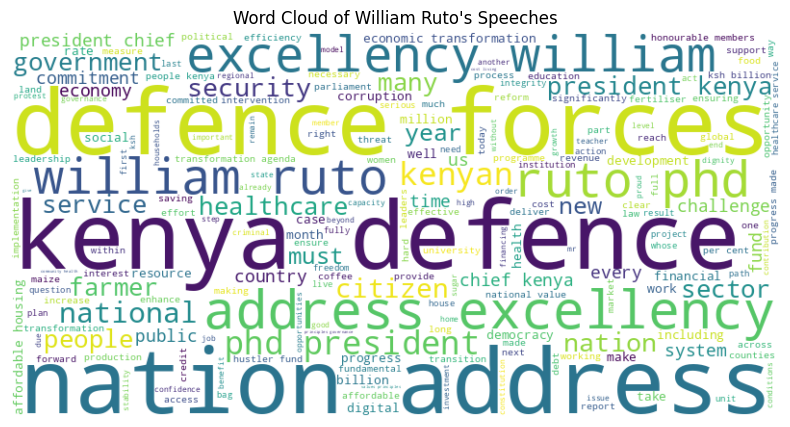

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of William Ruto's Speeches")
plt.show()

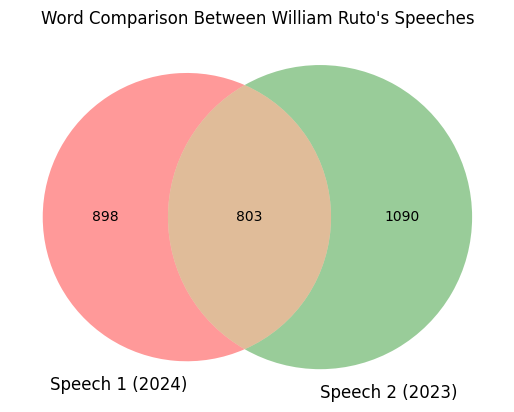


Words unique to Speech 1: ['play', 'wildest', 'ethical', 'chartered', 'harrison', 'overhaul', 'unlike', 'forge', 'ksh20', 'kengai']
Words unique to Speech 2: ['seek', 'steadily', 'ksh129', 'witnesses', 'burden', 'tragic', 'sake', 'thoroughly', 'disappearances', 'coming']
Words in both: ['struggling', 'announce', 'confront', 'ict', 'providing', 'historic', 'six', 'needs', 'continues', 'kingdom']


In [ ]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt


speech_1_words = set(speeches[0])  
speech_2_words = set(speeches[1])  

# Create the Venn diagram
venn2([speech_1_words, speech_2_words], 
      set_labels=('Speech 1 (2024)', 'Speech 2 (2023)'))


plt.title("Word Comparison Between William Ruto's Speeches")
plt.show()


print("\nWords unique to Speech 1:", list(speech_1_words - speech_2_words)[:10])
print("Words unique to Speech 2:", list(speech_2_words - speech_1_words)[:10])
print("Words in both:", list(speech_1_words & speech_2_words)[:10])